In [1]:
# Code used for data cleaning

import pandas as pd
import numpy as np
from scipy import stats

# Loading dataset
dataset = pd.read_csv("survey.csv")

# View structure
print(dataset.info())

# Checking for missing values
print(dataset.isnull().sum())

# Handling missing values
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

# Converting categorical variables
categorical_vars = ['anonymity', 'treatment', 'no_employees']
for var in categorical_vars:
    dataset[var] = dataset[var].astype('category')

# Removing duplicates
dataset = dataset.drop_duplicates()


# Calculate Q1, Q3, and IQR for Age
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1
print("iqr", IQR)

# Detecting outliers
outliers = dataset[(dataset['Age'] < (Q1 - 1.5 * IQR)) | (dataset['Age'] > (Q3 + 1.5 * IQR))]
print(list(outliers['Age']))

# Removing outliers from the dataset
dataset = dataset[(dataset['Age'] >= (Q1 - 1.5 * IQR)) & (dataset['Age'] <= (Q3 + 1.5 * IQR))]

import pandas as pd

# Define mapping
gender_mapping = {
    'male': 'Male', 'm': 'Male', 'man': 'Male', 'guy': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female',
    'non-binary': 'Non-Binary/Other', 'genderqueer': 'Non-Binary/Other', 
    'agender': 'Non-Binary/Other', 'trans': 'Non-Binary/Other', 
    'fluid': 'Non-Binary/Other', 'androgyne': 'Non-Binary/Other', 
    'enby': 'Non-Binary/Other', 'queer': 'Non-Binary/Other'
}

# Converting gender values to lowercase and strip spaces
dataset['Gender'] = dataset['Gender'].str.lower().str.strip()

# Replacing using mapping
for key, value in gender_mapping.items():
    dataset.loc[dataset['Gender'].str.contains(key, na=False, regex=True), 'Gender'] = value

# Handling specific misspellings manually
fix_typos = {
    'make': 'Male', 'mail': 'Male', 'msle': 'Male', 'malr': 'Male', 'maile': 'Male',
    'male-ish': 'Male', 'cis male': 'Male', 'cis man': 'Male',
    'femail': 'Female', 'femake': 'Female', 'cis female': 'Female',
}

dataset['Gender'] = dataset['Gender'].replace(fix_typos)

# Checking standardized categories
print(dataset['Gender'].value_counts(normalize=True) * 100)


# Verifing that the outliers have been removed
print(f"Cleaned dataset:\n{dataset['Age']}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Summary Statistics for Age:
count    1219.000000
mean       31.468417
std         6.276310
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        49.000000
Name: Age, dtype: float64
Standard Deviation: 6.276309749827426
Variance: 39.392064075778805
Skewness: 0.3967247509608969
Kurtosis: -0.34254837101969526
mode: 0    29
Name: Age, dtype: int64
Age Range: 31
Minimum Age: 18
Maximum Age: 49

Frequency Distribution for Anonymity:
anonymity
Don't know    64.971288
Yes           29.860541
No             5.168171
Name: proportion, dtype: float64

Frequency Distribution for Treatment:
treatment
Yes    50.369155
No     49.630845
Name: proportion, dtype: float64

Frequency Distribution for Organizational Size:
no_employees
6-25              23.461854
26-100            23.297785
More than 1000    21.903199
100-500           14.109926
1-5               12.387203
500-1000           4.840033
Name: proportion, dtype: float64

Frequency Distribution for anonym

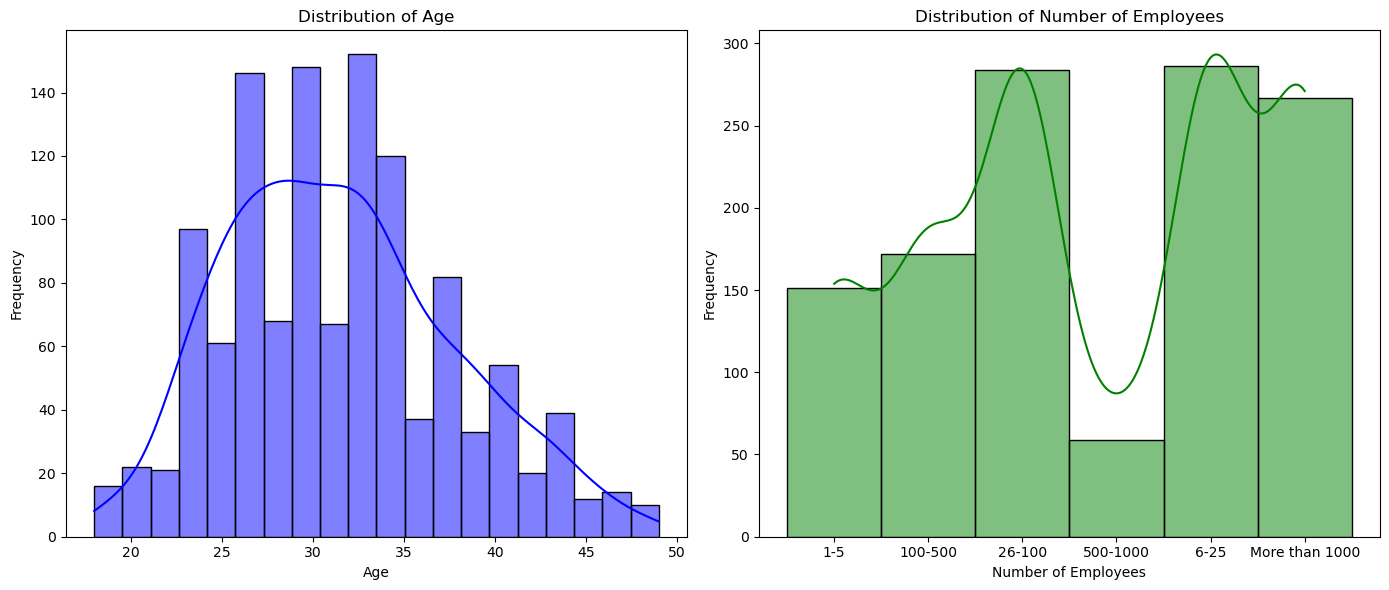


Summary Statistics for Number of Employees:
 count     1219
unique       6
top       6-25
freq       286
Name: no_employees, dtype: object

Treatment-Seeking Behavior by Gender:
treatment            No     Yes
Gender                         
Female            33.33   66.67
Male              50.69   49.31
Non-Binary/Other  14.29   85.71
nah                0.00  100.00
neuter             0.00  100.00

Treatment-Seeking Behavior by anonymity:
treatment      No    Yes
anonymity               
Don't know  55.05  44.95
No          42.86  57.14
Yes         39.01  60.99

Treatment-Seeking Behavior by no_employees:
treatment          No    Yes
no_employees                
1-5             43.71  56.29
100-500         44.77  55.23
26-100          48.24  51.76
500-1000        55.93  44.07
6-25            56.29  43.71
More than 1000  49.06  50.94

Treatment-Seeking Behavior by remote_work:
treatment       No    Yes
remote_work              
No           50.46  49.54
Yes          47.59  52.41

Trea

In [3]:
# code used for Descriptive Statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics for Age
print("Summary Statistics for Age:")
print(dataset['Age'].describe())
print("Standard Deviation:", dataset['Age'].std())
print("Variance:", dataset['Age'].var())
print("Skewness:", stats.skew(dataset['Age'], nan_policy='omit'))
print("Kurtosis:", stats.kurtosis(dataset['Age'], nan_policy='omit'))
print("mode:", dataset['Age'].mode())

# Calculating range
ages = dataset['Age']
age_range = ages.max() - ages.min()
print("Age Range:", age_range)

# Finding min and max values
print("Minimum Age:", ages.min())
print("Maximum Age:", ages.max())

# Descriptive Statistics for Categorical Variables
print("\nFrequency Distribution for Anonymity:")
print(dataset['anonymity'].value_counts(normalize=True) * 100)

print("\nFrequency Distribution for Treatment:")
print(dataset['treatment'].value_counts(normalize=True) * 100)

print("\nFrequency Distribution for Organizational Size:")
print(dataset['no_employees'].value_counts(normalize=True) * 100)

# Frequency Distribution for Categorical Variables
def categorical_summary(var):
    print("\nFrequency Distribution for", var, ":")
    print(dataset[var].value_counts())
    print(dataset[var].value_counts(normalize=True) * 100)

vars_to_analyze = ['anonymity', 'treatment', 'no_employees', 'Gender', 'Country', 'remote_work', 'tech_company', 'benefits', 'seek_help']

for var in vars_to_analyze:
    categorical_summary(var)
most_frequent_age = dataset['Age'].mode()[0]
print("Most Frequent Age (Mode):", most_frequent_age)
print("Updated Min Age:", dataset['Age'].min())
print("Updated Max Age:", dataset['Age'].max())

# Setting up the figure for subplots
plt.figure(figsize=(14, 6))

# Plot for distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(dataset['Age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot for distribution of no_employees
plt.subplot(1, 2, 2)
sns.histplot(dataset['no_employees'], kde=True, color='green', bins=20)
plt.title('Distribution of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()

# Summary of statistics for both continuous variables
no_employees_stats = dataset['no_employees'].describe()
print("\nSummary Statistics for Number of Employees:\n", no_employees_stats)

# Computing Treatment-Seeking Rates by Factor
factors = ['Gender', 'anonymity', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'seek_help']
treatment_stats = {}

for factor in factors:
    treatment_stats[factor] = pd.crosstab(dataset[factor], dataset['treatment'], normalize='index') * 100

# Displaying results
for factor, table in treatment_stats.items():
    print(f"\nTreatment-Seeking Behavior by {factor}:")
    print(table.round(2))


Degrees of Freedom: 2
Expected Frequency Table: 
[[393.07629204 398.92370796]
 [ 31.26743232  31.73256768]
 [180.65627564 183.34372436]]

**Chi-Square Test for Independence**
χ²(2) = 26.88, p = 0.0000014529
Interpretation: Reject the null hypothesis. There is a significant relationship between anonymity and treatment-seeking behavior.

**T-Test between Treatment Seekers and Non-Seekers**
t(1217) = 5.20, p = 0.0000002319
Interpretation: Reject the null hypothesis. Significant difference in perceived anonymity between treatment-seekers and non-seekers.
no_employees
6-25              286
26-100            284
More than 1000    267
100-500           172
1-5               151
500-1000           59
Name: count, dtype: int64

**Kruskal-Wallis Test for Organizational Size**
H(5) = 14.50, p = 0.0007
Interpretation: Reject the null hypothesis. Organizational size significantly affects anonymity & treatment-seeking behavior.
Optimization terminated successfully.
         Current function value: 0

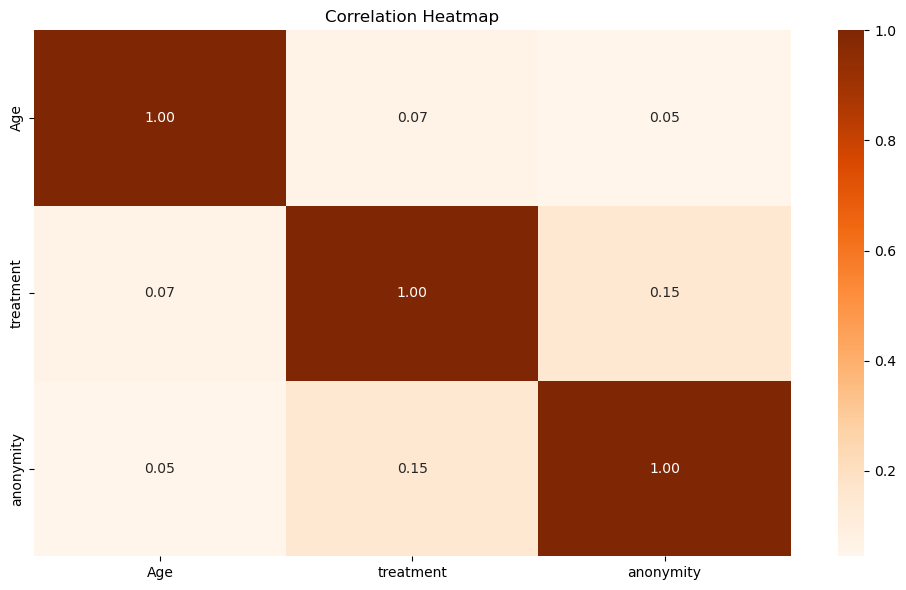

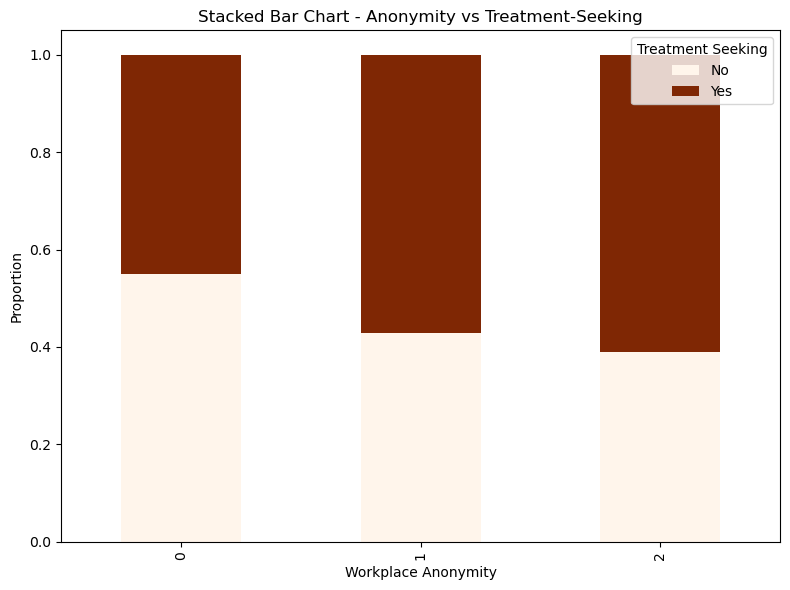

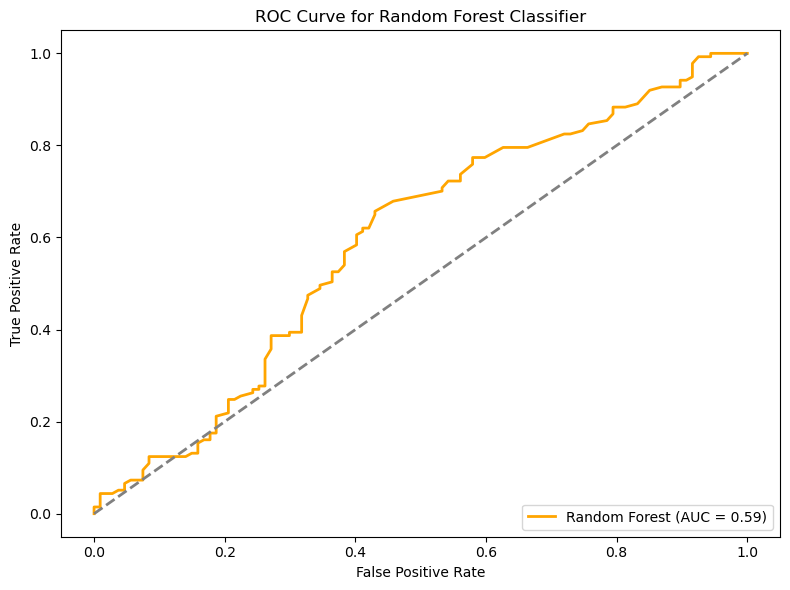

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Converting categorical variables
dataset['treatment'] = dataset['treatment'].astype('category').cat.codes
categorical_cols = ['anonymity', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'seek_help']
for col in categorical_cols:
    dataset[col] = dataset[col].astype('category')

# 1. Chi-Square Test for Independence
# Hypothesis: There is a relationship between perceived anonymity and treatment-seeking behavior
chi2, p, dof, expected = chi2_contingency(pd.crosstab(dataset['anonymity'], dataset['treatment']))

print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequency Table: \n{expected}")
print("\n**Chi-Square Test for Independence**")
print(f"χ²({dof}) = {chi2:.2f}, p = {p:.10f}")
if p < 0.05:
    print("Interpretation: Reject the null hypothesis. There is a significant relationship between anonymity and treatment-seeking behavior.")
else:
    print("Interpretation: Fail to reject the null hypothesis. No significant relationship between anonymity and treatment-seeking behavior.")


# 2. T-Test for Treatment-Seeking and Anonymity
# Converting 'anonymity' to numeric codes
dataset['anonymity'] = dataset['anonymity'].cat.codes  

t_stat, p_ttest = ttest_ind(
    dataset.loc[dataset['treatment'] == 1, 'anonymity'],
    dataset.loc[dataset['treatment'] == 0, 'anonymity'],
    equal_var=False
)
print(f"\n**T-Test between Treatment Seekers and Non-Seekers**")
print(f"t({len(dataset)-2}) = {t_stat:.2f}, p = {p_ttest:.10f}")

if p_ttest < 0.05:
    print("Interpretation: Reject the null hypothesis. Significant difference in perceived anonymity between treatment-seekers and non-seekers.")
else:
    print("Interpretation: Fail to reject the null hypothesis. No significant difference in perceived anonymity between treatment-seekers and non-seekers.")



# Kruskal-Wallis Test to determine affect of organization size
from scipy.stats import kruskal
# Checking if all categories have enough data
print(dataset['no_employees'].value_counts())
# Droping missing values
dataset_clean = dataset.dropna(subset=['no_employees', 'anonymity'])
# Converting 'no_employees' to numeric codes
dataset_clean['no_employees'] = dataset_clean['no_employees'].cat.codes
# Run Kruskal-Wallis Test
kruskal_stat, p_kruskal = kruskal(
    dataset_clean.loc[dataset_clean['no_employees'] == 0, 'anonymity'],
    dataset_clean.loc[dataset_clean['no_employees'] == 1, 'anonymity'],
    dataset_clean.loc[dataset_clean['no_employees'] == 2, 'anonymity']
)

print(f"\n**Kruskal-Wallis Test for Organizational Size**")
print(f"H({len(dataset_clean['no_employees'].unique())-1}) = {kruskal_stat:.2f}, p = {p_kruskal:.4f}")

if p_kruskal < 0.05:
    print("Interpretation: Reject the null hypothesis. Organizational size significantly affects anonymity & treatment-seeking behavior.")
else:
    print("Interpretation: Fail to reject the null hypothesis. No significant effect of organizational size.")


# 4. Logistic Regression for Interaction Effects
logistic_model = smf.logit("treatment ~ C(anonymity) * C(no_employees) + C(remote_work) + C(tech_company) + C(benefits) + C(seek_help)", data=dataset).fit(maxiter=1000)
print("\n**Logistic Regression Summary**")
print(logistic_model.summary())

# Extracting coefficients and p-values
coef_df = logistic_model.summary2().tables[1]

# Interpretation
print("\n**Logistic Regression Interpretation**")
for index, row in coef_df.iterrows():
    if row['P>|z|'] < 0.05:
        print(f"{index}: Significant predictor (p = {row['P>|z|']:.4f}), suggesting a meaningful impact on treatment-seeking behavior.")
    else:
        print(f"{index}: Not a significant predictor (p = {row['P>|z|']:.4f}).")


# 5. Random Forest Classifier for Predictive Modeling
X = dataset[['anonymity', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'seek_help']]
X = pd.get_dummies(X, drop_first=True)
y = dataset['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("\n**Random Forest Classifier Performance**")
print(classification_report(y_test, y_pred))

# Cross-Validation for Random Forest
# Defining 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing Cross-Validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

print("\n**Cross-Validation Results (Random Forest Classifier)**")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


# Ensure only numeric columns are used for correlation
numeric_dataset = dataset.select_dtypes(include=[np.number])  # Selects only numeric columns

# Visualization: Heatmap of Correlations
plt.figure(figsize=(10,6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='Oranges', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# Visualization: Stacked Bar Chart ----
crosstab = pd.crosstab(dataset['anonymity'], dataset['treatment'], normalize='index')
crosstab.plot(kind='bar', stacked=True, colormap='Oranges', figsize=(8, 6))
plt.title("Stacked Bar Chart - Anonymity vs Treatment-Seeking")
plt.xlabel("Workplace Anonymity")
plt.ylabel("Proportion")
plt.legend(title="Treatment Seeking", labels=["No", "Yes"])
plt.tight_layout()
plt.savefig("stacked_bar_chart.png")
plt.show()

# Visualization: ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title("ROC Curve for Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()

# Save Results of logistic model
logistic_model_summary = logistic_model.summary()
# Converting logistic regression results to DataFrame before saving
logistic_summary_df = pd.DataFrame(logistic_model.summary().tables[1].data)
# Saving as CSV
logistic_summary_df.to_csv("logistic_interaction_results.csv", index=False, header=False)
